In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # inverse matrix base on LU
def LU_inv(A): 
        n = len(A)
        L = np.mat(np.eye(n))
        U = np.mat(A)

          #LU Decomposition base on Gaussian Elimination
        for i in range(n-1):
            L[i+1: , i] = U[i+1: , i] / U[i , i]
            U[i+1: , :] = U[i+1: , :] - L[i+1: , i] * U[i , :] #L[i+1: , i] = 消除係數

          # E1 = U^(-1)
        E1 = np.array(np.eye(n)) 
        for i in range(n-1,-1,-1):
                # 對角線為1
                E1[i , :] = E1[i , :]/U[i , i]
                U[i , :] = U[i , :]/U[i , i]
 
                E1[:i , :] = E1[:i , :] - U[:i , i] * E1[i , :]
                U[:i , :] = U[:i , :] - U[:i , i] * U[i , :]
        
          # E2 = L^(-1)
        E2 = np.array(np.eye(n))
        for i in range(n):
                E2[i+1: , :] = E2[i+1: , :] - L[i+1: , i] * E2[i , :]
                L[i+1: , :] = L[i+1: , :] - L[i+1: , i] * U[i , :]
        A_inv = np.dot(E1 , E2)
        return A_inv

def trans(m):
    m = zip(*m)
    A_T = list(m)
    A_T = np.asarray(A_T)
    return A_T
    
  # power = n元二次方程式; method = LSE(1) / Newton(2) ; lamda = LSE_weight ; loop = Newton 迭幾次
def Funcction(FileName, power, method, lamda = 1, loop = 5): 
    #input
    df = pd.read_excel(FileName)
    X = df[df.columns[0]].values
    Y = df[df.columns[1]].values
    Y = Y.reshape(23, 1)
    plt.scatter (X,Y)    
      #extend input
    X_b = np.c_[np.ones((23, 1)), X]
    if power != 1:
        for n in range(2, power+1):
            X_b = np.c_[X_b, X**n]
      # A = extend後的input
    A = X_b   
    I = np.mat(np.eye(power+1))
      #A_T
    A_T = trans(A)
      #LSE
    if method == 1:
          #LU_inv(A)
        A_LU_inv = LU_inv((np.dot(A_T, A) + lamda*I))    
          #LSE 
        Xnew = np.dot(np.dot(A_LU_inv, A_T),Y) 
          #draw
        Ynew = 0
        for i in range(power+1):
            Ynew = Ynew + Xnew[i]*X**(i)
        plt.plot (X,Ynew)
        print("> power=", power)
        print("> method=", "LSE")
        print("> lamda=", lamda)
        print("> Line : y=", end=" ")
        for ii in reversed(Xnew):
            if  i > 0:
                print(ii,'x^', i, "+",end=" ")
                i = i -1
            else:
                print(Xnew[0],end=" ")
        Ynew = Ynew.reshape(23, 1)
        TotErr = np.dot(trans(Ynew-Y),(Ynew-Y))
        print("\n> Total Error :",TotErr[0][0])
      # Newton
    else:
          #LU_inv(A)
        A_N1 = LU_inv(np.dot(2*A_T,A)) #第一個括號
          #Newton
        Xnew = np.random.randn(power+1, 1)        
        count = 0
        while (count < loop):
            A_N2 = np.dot(np.dot(2*A_T, A), Xnew) - np.dot(2*A_T, Y) #第二個括號
            Xnew = Xnew - np.dot(A_N1, A_N2)
            count = count + 1          
          #draw
        Ynew = 0
        for i in range(power+1):
            Ynew = Ynew + Xnew[i]*X**(i) 
        plt.plot (X,Ynew)
        print("> power=", power)
        print("> method=", "Newton")
        print("> loop=", loop)      
        print("> Line : y=", end=" ")
        for ii in reversed(Xnew):
            if  i > 0:
                print(ii,'x^', i, "+",end=" ")
                i = i -1
            else:
                print(Xnew[0],end=" ")
        Ynew = Ynew.reshape(23, 1)
        TotErr = np.dot(trans(Ynew-Y),(Ynew-Y))
        print("\n> Total Error :",TotErr[0][0])

## Function(FileName, power, method, lamda, loop)
**1.FileName = input data 檔名; <br />
2.power = n元二次方程式 ; <br />
3.method = LSE(1) / Newton(2) ; <br />
4.lamda = LSE_weight  預設為1 ; <br />
5.loop = Newton 迭幾次 預設為5 <br />**

> power= 2
> method= LSE
> lamda= 0
> Line : y= [3.02385339] x^ 2 + [4.90619026] x^ 1 + [-0.23140175] 
> Total Error : 26.559959478868453


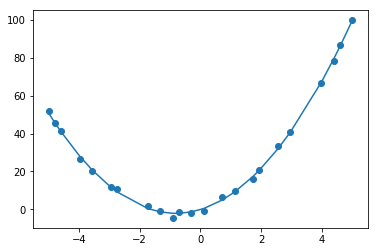

In [13]:
Funcction('HW01_input.xlsx', 2, 1,0, 5)